# Task 1

In [1]:
from utils import *
from MySolution import MyClassifier
from sklearn.decomposition import PCA

## Synthetic Data

In [2]:
syn_data = prepare_synthetic_data()
X_train, y_train = syn_data['trainX'], syn_data['trainY']
X_test, y_test = syn_data['testX'], syn_data['testY']

In [3]:
clf_syn = MyClassifier()
clf_syn.train(X_train, y_train)
y_pred = clf_syn.predict(X_test)

In [4]:
acc_syn = clf_syn.evaluate(X_test, y_test)
print(f"Accuracy: {acc_syn*100:.2f}%")

Accuracy: 97.20%


### Confusion Matrix

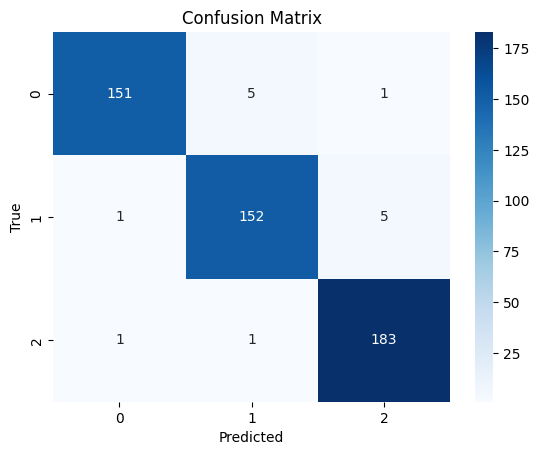

In [5]:
clf_syn.plot_confusion_matrix(y_pred, y_test)

### Decision Boundary

#### Training Split

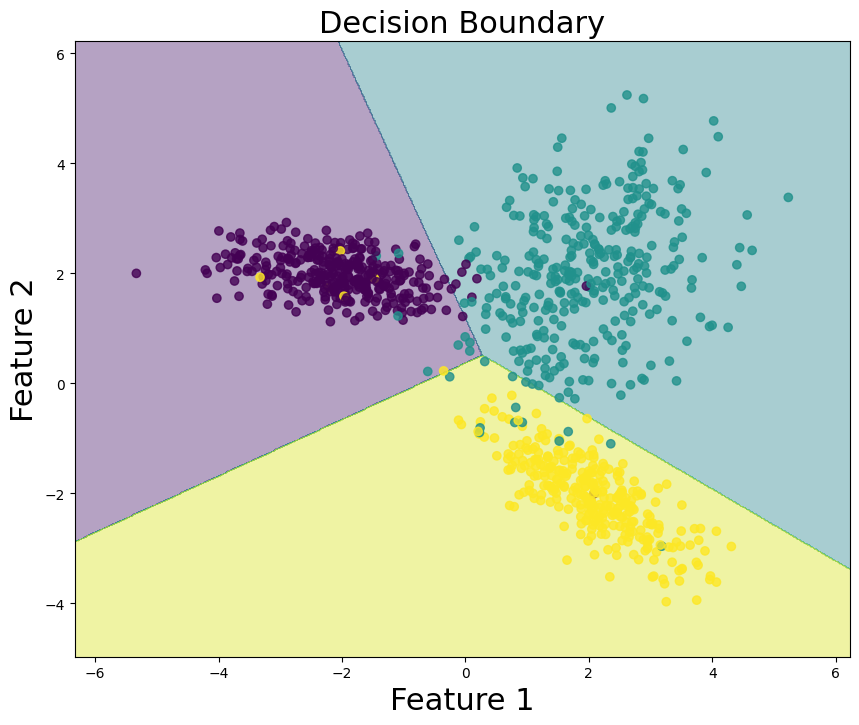

In [6]:
clf_syn.plot_decision_boundary(X_train, y_train, title="Decision Boundary")

#### Test Split

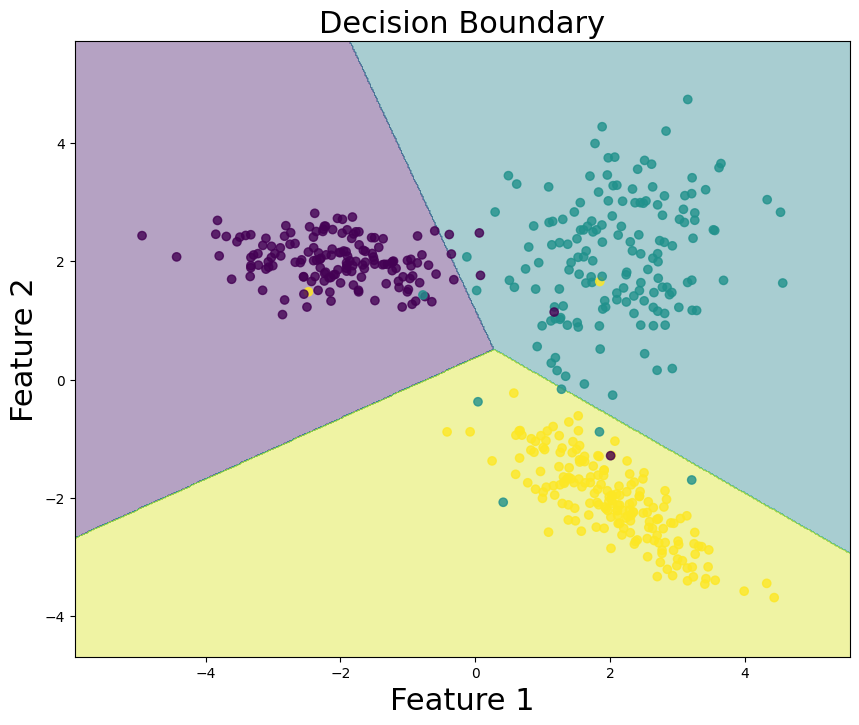

In [7]:
clf_syn.plot_decision_boundary(X_test, y_test, title="Decision Boundary")

### Different regularization parameters

In [8]:
lambdas = [0.1, 0.5, 1, 5, 10, 50, 100]
accuracies = []
for l in lambdas:
    clf_syn = MyClassifier(lambda_reg=l)
    clf_syn.train(X_train, y_train)
    y_pred = clf_syn.predict(X_test)
    accuracy = clf_syn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

In [9]:
print('The best lambda and its accuracy:', lambdas[np.argmax(accuracies)], np.max(accuracies))

The best lambda and its accuracy: 5 0.974


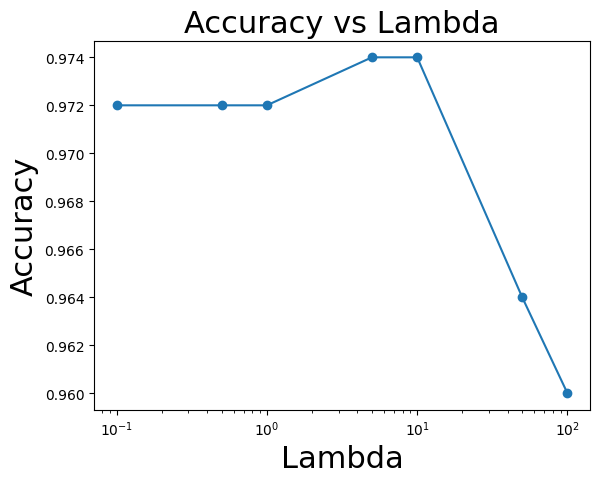

In [10]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.xscale('log')
plt.show()

## Fashion MNIST

PCA has been used here to reduce the dimensionality of the data. The data has been reduced to different dimensions and the accuracy of the model has been calculated for each dimension. The accuracy has been plotted against the number of dimensions.

When the data is reduced to 2 dimensions, the decision boundary is plotted.

In [11]:
# load mnist data
mnist_data = prepare_mnist_data()

n_dim = [784, 500, 300, 100, 10, 5, 2]

### Full dimensionality

In [12]:
pca = PCA(n_components=n_dim[0]) 
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [13]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [14]:
accs = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {accs*100:.2f}%")

Accuracy: 76.40%


#### Confusion Matrix

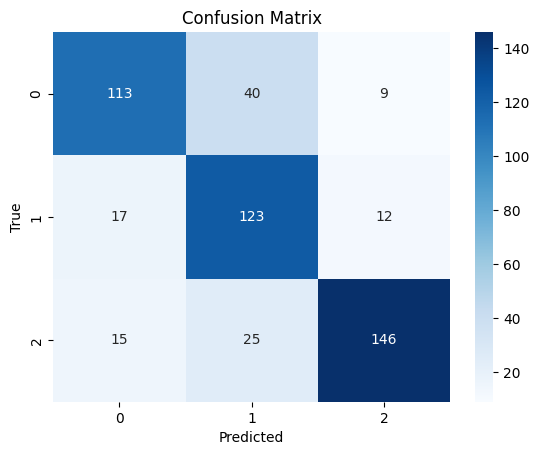

In [15]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

### Different Dimensionality

In [16]:
# plot the accuracy vs number of dimensions
accs = []
for n in n_dim:
    pca = PCA(n_components=n)
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier()
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)

    accs.append(clf_mnist.evaluate(testX_reduced, testY))

In [17]:
print(accs)
print('Max accuracy and occuring at n_dim:', max(accs), n_dim[accs.index(max(accs))])

[0.764, 0.86, 0.868, 0.882, 0.9, 0.874, 0.676]
Max accuracy and occuring at n_dim: 0.9 10


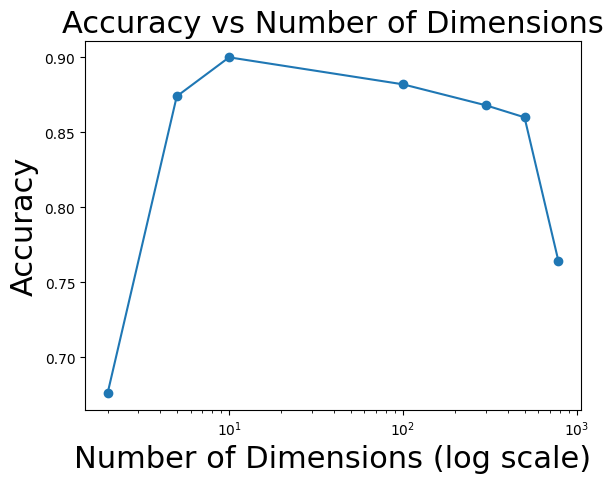

In [18]:
#scatter with line plot and dim on log scale
plt.scatter(n_dim, accs)
plt.plot(n_dim, accs)
plt.xlabel("Number of Dimensions (log scale)", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Number of Dimensions", fontsize=22)
plt.xscale('log')
plt.show()

### Decision Boundary (only 2 features using PCA)

In [19]:
pca = PCA(n_components=n_dim[-1])  # Reduce to 50 dimensions
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [20]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [21]:
acc_mnist_2 = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {acc_mnist_2*100:.2f}%")

Accuracy: 67.60%


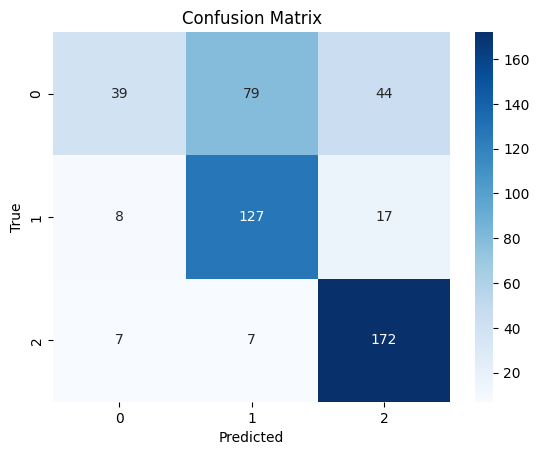

In [22]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

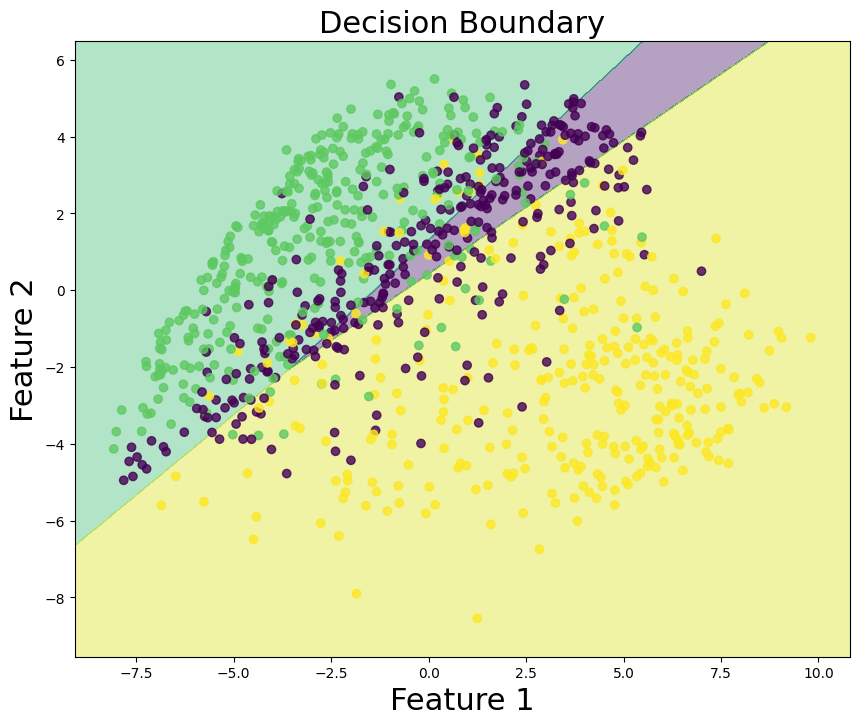

In [23]:
clf_mnist.plot_decision_boundary(trainX_reduced, trainY, title="Decision Boundary")

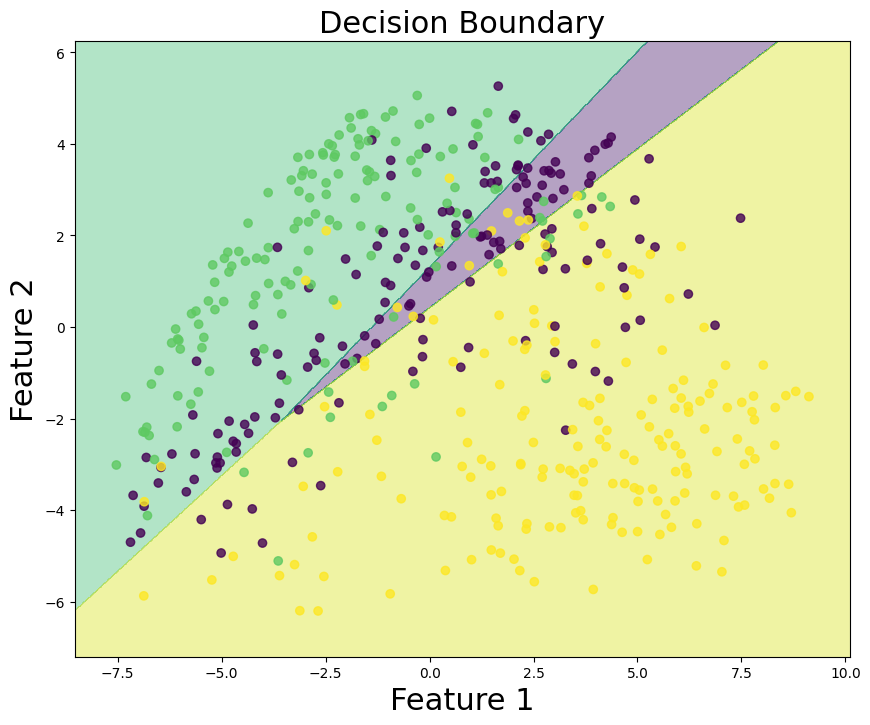

In [24]:
clf_mnist.plot_decision_boundary(testX_reduced, testY, title="Decision Boundary")

### Different Regularization Parameters

In [25]:
lambdas = [1e-4, 1e-2, 0.1, 1, 5, 10]
n_dim = 10 # max of accuracy vs number of dimensions
accuracies = []
for l in lambdas:
    pca = PCA(n_components=n_dim)  # Reduce to 10 dimensions as max accuracy occurs at 10
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier(lambda_reg=l)
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)
    accuracy = clf_mnist.evaluate(testX_reduced, testY)
    accuracies.append(accuracy)

In [26]:
print('The maximum accuracy and the lambda value:', max(accuracies), lambdas[accuracies.index(max(accuracies))])
acc_mnist = max(accuracies)

The maximum accuracy and the lambda value: 0.9 0.1


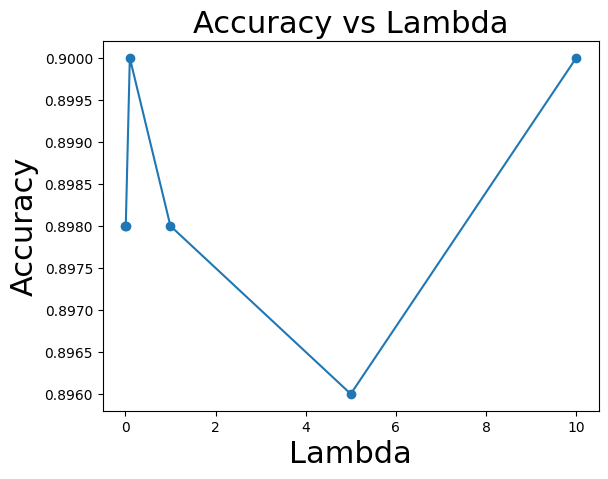

In [27]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.show()

# Task 2

In [1]:
import json
from MySolution import MyClustering, plot_clustering_nmi, plot_classification_accuracy, plot_performance_across_partitions
from utils import *

In [2]:
K_synthetic = [3, 5, 10]
K_mnist = [3, 10, 32]
result2 = {}

### Synthetic Data

#### Full Dataset

In [3]:
nmi_list = []
accuracy_list = []
# Synthetic data experiments
for K in K_synthetic:
    data = prepare_synthetic_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print('-'*30)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 10 iterations.
------------------------------
Clustering NMI for K=3: 0.8278254854605318
Classification accuracy for K=3: 0.968
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 13 iterations.
------------------------------
Clustering NMI for K=5: 0.8196789328405385
Classification accuracy for K=5: 0.962
##############################
Number of components selected: 2
Explained variance covered: 1.00
------------------------------
Clustering NMI for K=10: 0.8105398189336839
Classification accuracy for K=10: 0.964
##############################


#### 0.75, 0.50, 0.25 of Dataset

In [4]:
# Synthetic data experiments
data_portions = [0.25, 0.5, 0.75, 1]
result2_portion = {}
for portion in data_portions:
    nmi_list = []
    accuracy_list = [] 
    for K in K_synthetic:
        data = prepare_synthetic_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = MyClustering(K)
        clustering_class.train(data['trainX'])
        #change dtype of trainY to int
        data['trainY'] = data['trainY'].astype(int)
        nmi = clustering_class.evaluate_clustering(data['trainY'])
        nmi_list.append(nmi)
        print('-'*30)
        print(f"Clustering NMI for K={K} and portion={portion}: {nmi}")
        accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
        if f'{portion}' not in result2_portion:
            result2_portion[f'{portion}'] = {}

        if 'synthetic' not in result2_portion[f'{portion}']:
            result2_portion[f'{portion}']['synthetic'] = {}
    result2_portion[f'{portion}']['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 6 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.25: 0.8615730613393134
Classification accuracy for K=3 and portion=0.25: 0.966
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
------------------------------
Clustering NMI for K=5 and portion=0.25: 0.7747125176667101
Classification accuracy for K=5 and portion=0.25: 0.946
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 6 iterations.
------------------------------
Clustering NMI for K=10 and portion=0.25: 0.8632887866866866
Classification accuracy for K=10 and portion=0.25: 0.966
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 11 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.5: 0.872155

### Fashion MNIST Dataset

#### Full Dataset

In [5]:
nmi_list = []
accuracy_list = []
# MNIST data experiments
for K in K_mnist:
    data = prepare_mnist_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print('-'*30)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2['mnist'] = {'K': K_mnist, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2)

Number of components selected: 123
Explained variance covered: 0.95
Converged after 13 iterations.
------------------------------
Clustering NMI for K=3: 0.28889111978394183
Classification accuracy for K=3: 0.612
##############################
Number of components selected: 123
Explained variance covered: 0.95
------------------------------
Clustering NMI for K=10: 0.5250348069952632
Classification accuracy for K=10: 0.798
##############################
Number of components selected: 123
Explained variance covered: 0.95
Converged after 20 iterations.
------------------------------
Clustering NMI for K=32: 0.5560726774444229
Classification accuracy for K=32: 0.854
##############################
{'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8278254854605318), np.float64(0.8196789328405385), np.float64(0.8105398189336839)], 'classification_accuracy': [0.968, 0.962, 0.964]}, 'mnist': {'K': [3, 10, 32], 'clustering_nmi': [np.float64(0.28889111978394183), np.float64(0.52503

#### 0.25, 0.50., 0.75 of the Dataset

In [6]:
# Mnist data experiments
data_portions = [0.25, 0.5, 0.75, 1]
for portion in data_portions:
    nmi_list = []
    accuracy_list = []
    for K in K_mnist:
        data = prepare_mnist_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = MyClustering(K)
        clustering_class.train(data['trainX'])
        #change dtype of trainY to int
        data['trainY'] = data['trainY'].astype(int)
        nmi = clustering_class.evaluate_clustering(data['trainY'])
        nmi_list.append(nmi)
        print('-'*30)
        print(f"Clustering NMI for K={K} and portion={portion}: {nmi}")
        accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
    result2_portion[f'{portion}']['mnist'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2_portion)

Number of components selected: 77
Explained variance covered: 0.95
Converged after 16 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.25: 0.2861072828270944
Classification accuracy for K=3 and portion=0.25: 0.582
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 8 iterations.
------------------------------
Clustering NMI for K=10 and portion=0.25: 0.5224518773725332
Classification accuracy for K=10 and portion=0.25: 0.81
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 11 iterations.
------------------------------
Clustering NMI for K=32 and portion=0.25: 0.6115721096215081
Classification accuracy for K=32 and portion=0.25: 0.834
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converged after 9 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.5: 0

### Soft Clustering Classifier

#### Synthetic Data

In [7]:
from MySolution import run_soft_clustering_classifier, compare_soft_vs_hard_clustering

In [8]:
# Synthetic data experiments
data_portions = [0.25, 0.5, 0.75, 1]
result2_soft_clustering = {}
for portion in data_portions:
    nmi_list = []
    accuracy_list = [] 
    for K in K_synthetic:
        data = prepare_synthetic_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = run_soft_clustering_classifier(data['trainX'], data['trainY'], K)
        accuracy = clustering_class.evaluate(data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
        if f'{portion}' not in result2_soft_clustering:
            result2_soft_clustering[f'{portion}'] = {}

        if 'synthetic' not in result2_soft_clustering[f'{portion}']:
            result2_soft_clustering[f'{portion}']['synthetic'] = {}
    result2_soft_clustering[f'{portion}']['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
Classification accuracy for K=3 and portion=0.25: 0.96
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 8 iterations.
Classification accuracy for K=5 and portion=0.25: 0.968
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 17 iterations.
Classification accuracy for K=10 and portion=0.25: 0.972
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
Classification accuracy for K=3 and portion=0.5: 0.958
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 13 iterations.
Classification accuracy for K=5 and portion=0.5: 0.968
##############################
Number of components selected: 2
Explained variance covered: 1.00
Classification accu

In [9]:
# Mnist data experiments
data_portions = [0.25, 0.5, 0.75, 1]
for portion in data_portions:
    nmi_list = []
    accuracy_list = []
    for K in K_mnist:
        data = prepare_mnist_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = run_soft_clustering_classifier(data['trainX'], data['trainY'], K)
        accuracy = clustering_class.evaluate(data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
    result2_soft_clustering[f'{portion}']['mnist'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2_soft_clustering)

Number of components selected: 77
Explained variance covered: 0.95
Converged after 9 iterations.
Classification accuracy for K=3 and portion=0.25: 0.894
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 9 iterations.
Classification accuracy for K=10 and portion=0.25: 0.888
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 6 iterations.
Classification accuracy for K=32 and portion=0.25: 0.89
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converged after 13 iterations.
Classification accuracy for K=3 and portion=0.5: 0.904
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converged after 11 iterations.
Classification accuracy for K=10 and portion=0.5: 0.902
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converge

#### Results

In [10]:
print("Full Dataset Results")
# print as json format
print(result2)
print("Portion Dataset Results")
# print as json format
print(result2_portion)
print("Soft Clustering Results")
print(result2_soft_clustering)

Full Dataset Results
{'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8278254854605318), np.float64(0.8196789328405385), np.float64(0.8105398189336839)], 'classification_accuracy': [0.968, 0.962, 0.964]}, 'mnist': {'K': [3, 10, 32], 'clustering_nmi': [np.float64(0.28889111978394183), np.float64(0.5250348069952632), np.float64(0.5560726774444229)], 'classification_accuracy': [0.612, 0.798, 0.854]}}
Portion Dataset Results
{'0.25': {'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8615730613393134), np.float64(0.7747125176667101), np.float64(0.8632887866866866)], 'classification_accuracy': [0.966, 0.946, 0.966]}, 'mnist': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.2861072828270944), np.float64(0.5224518773725332), np.float64(0.6115721096215081)], 'classification_accuracy': [0.582, 0.81, 0.834]}}, '0.5': {'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8721559548397576), np.float64(0.8630483120527359), np.float64(0.8484484634758835)], 'cl

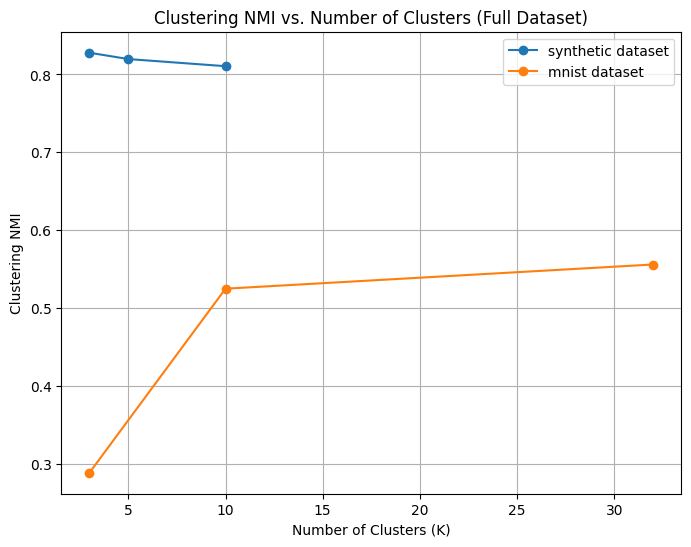

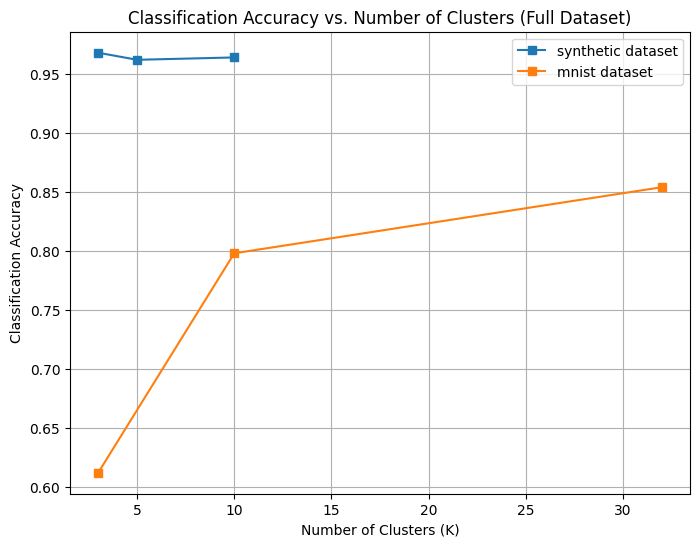

In [11]:
# Generate Plots
plot_clustering_nmi(result2, "Clustering NMI vs. Number of Clusters (Full Dataset)")
plot_classification_accuracy(result2, "Classification Accuracy vs. Number of Clusters (Full Dataset)")

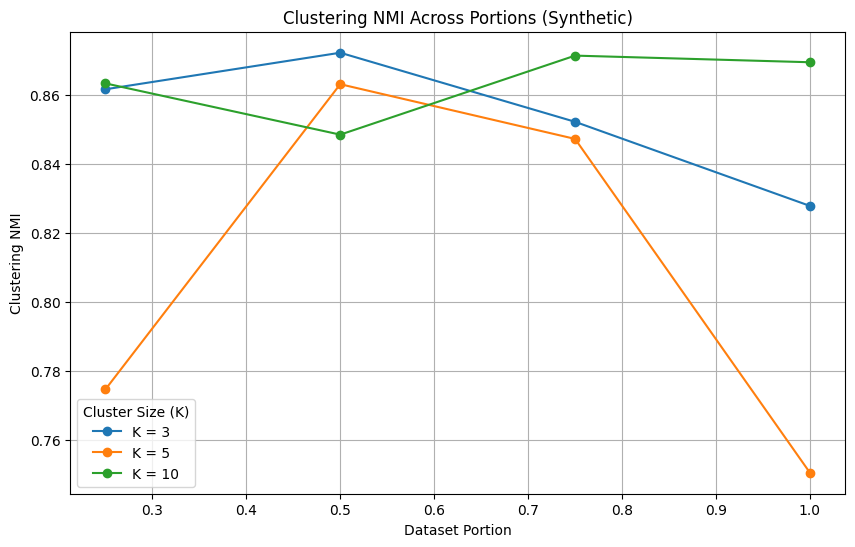

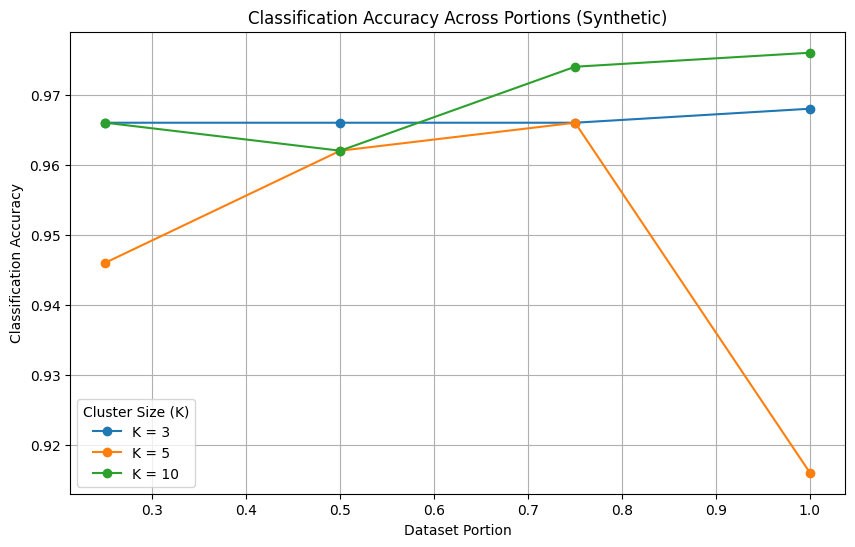

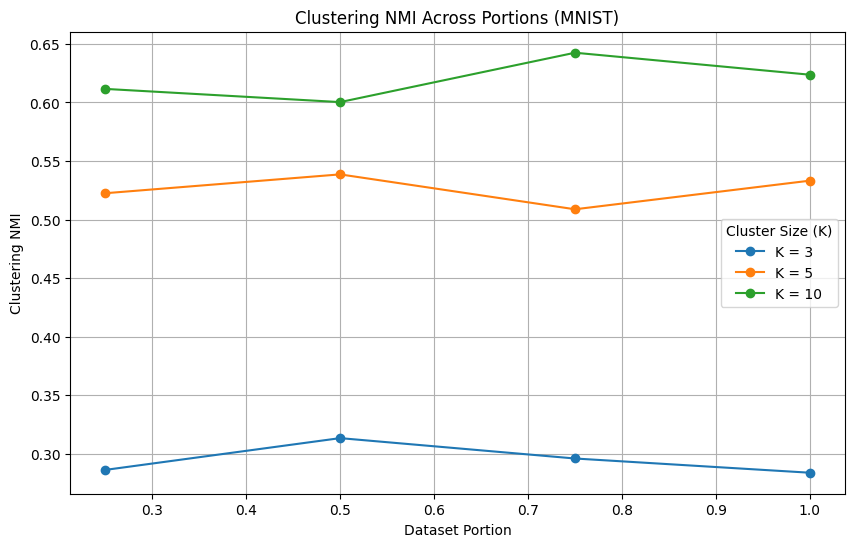

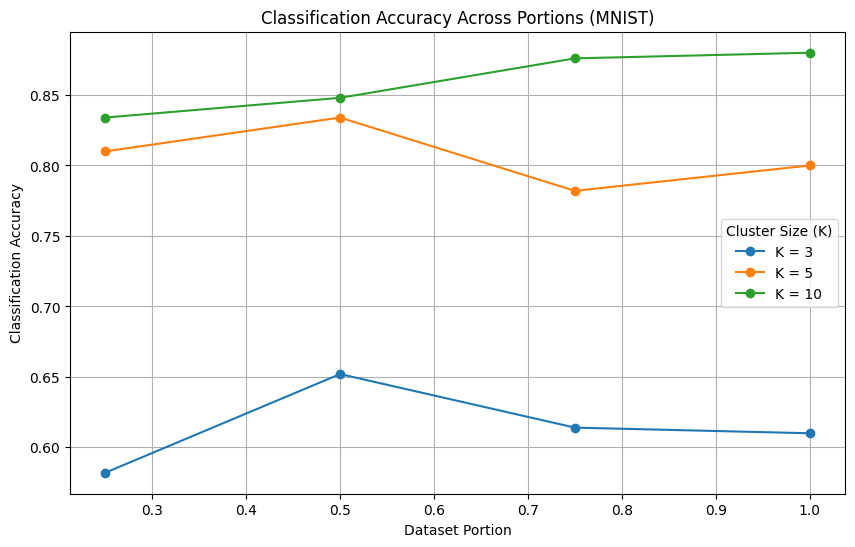

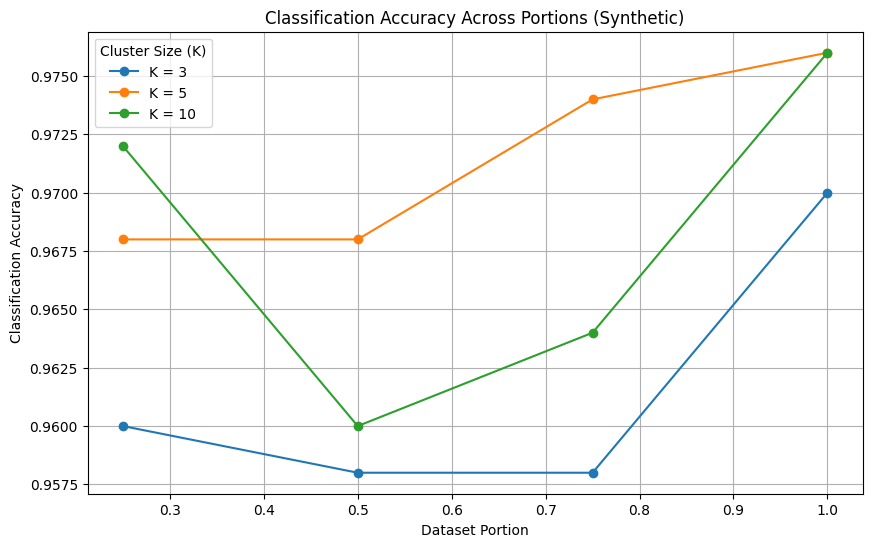

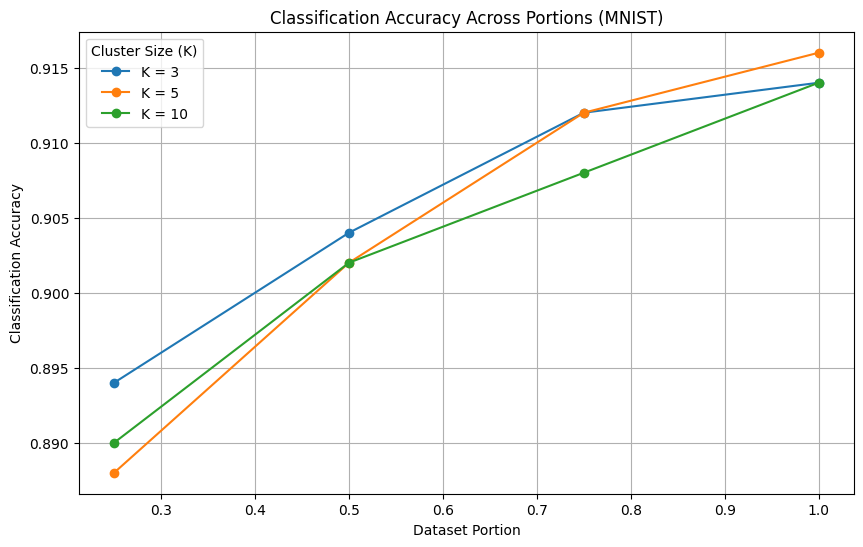

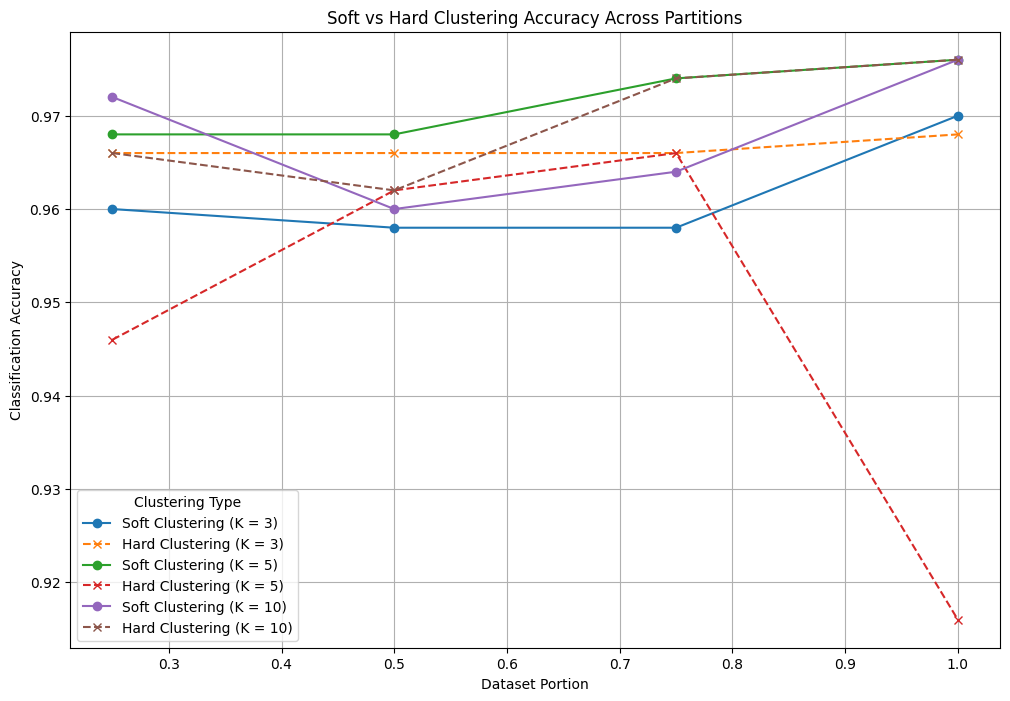

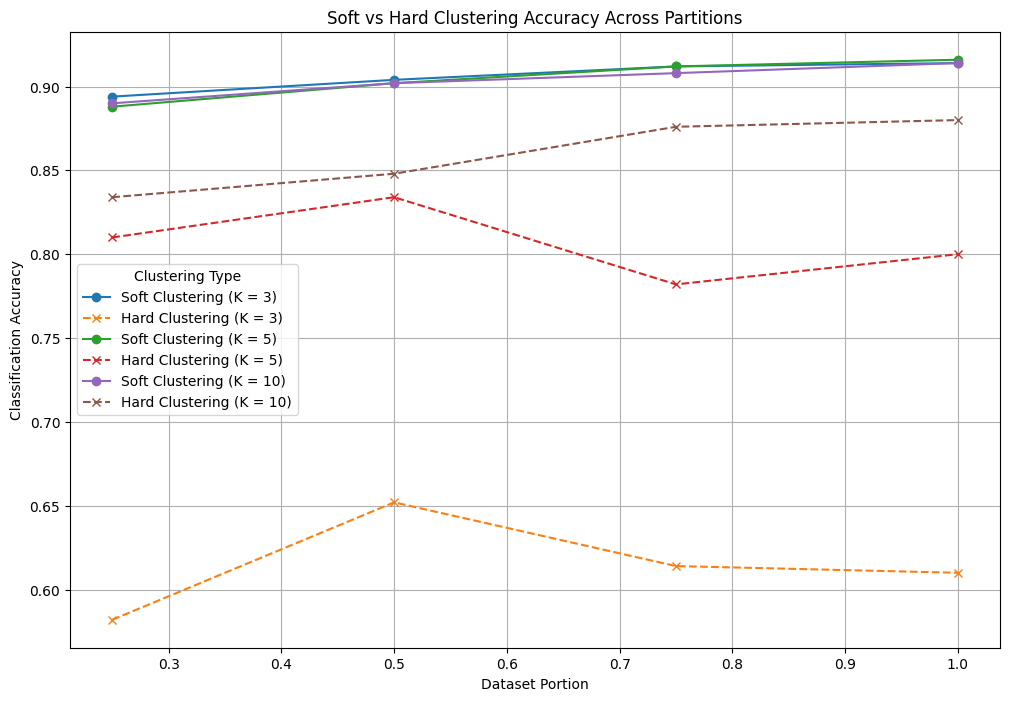

In [12]:
# Plot clustering NMI and classification accuracy for synthetic dataset
plot_performance_across_partitions(result2_portion, 'synthetic', 'clustering_nmi', 
                                    "Clustering NMI Across Portions (Synthetic)", "Clustering NMI")
plot_performance_across_partitions(result2_portion, 'synthetic', 'classification_accuracy', 
                                    "Classification Accuracy Across Portions (Synthetic)", "Classification Accuracy")

# Plot clustering NMI and classification accuracy for MNIST dataset
plot_performance_across_partitions(result2_portion, 'mnist', 'clustering_nmi', 
                                    "Clustering NMI Across Portions (MNIST)", "Clustering NMI")
plot_performance_across_partitions(result2_portion, 'mnist', 'classification_accuracy', 
                                    "Classification Accuracy Across Portions (MNIST)", "Classification Accuracy")

# Plot classification accuracy for soft clustering
plot_performance_across_partitions(result2_soft_clustering, 'synthetic', 'classification_accuracy', 
                                    "Classification Accuracy Across Portions (Synthetic)", "Classification Accuracy")

plot_performance_across_partitions(result2_soft_clustering, 'mnist', 'classification_accuracy',
                                    "Classification Accuracy Across Portions (MNIST)", "Classification Accuracy")

# Plot classification accuracy for soft clustering vs normal clustering for synthetic dataset with partitions
compare_soft_vs_hard_clustering(
    result2_soft_clustering,
    result2_portion,
    dataset_name="synthetic",
    metric="classification_accuracy",
    title="Soft vs Hard Clustering Accuracy Across Partitions",
    ylabel="Classification Accuracy",
)

compare_soft_vs_hard_clustering(
    result2_soft_clustering,
    result2_portion,
    dataset_name="mnist",
    metric="classification_accuracy",
    title="Soft vs Hard Clustering Accuracy Across Partitions",
    ylabel="Classification Accuracy",
)

# Task 3

In [37]:
import numpy as np
from gekko import GEKKO
from MySolution import *
from utils import *


data = prepare_mnist_data()
trainX = data['trainX']
trainY = data['trainY'].astype(np.int64)

testX = data['testX']
testY = data['testY'].astype(np.int64)


In [38]:
num_features_list = [5, 20, 80, 320, 784]
# num_features_list = [80]


# Store the features being chosen for visualization later
classifier_features_dict = {}
clustering_features_dict = {}
random_features_dict = {}

# Store accuracy metrics
classifier_accuracy_selected = np.zeros(len(num_features_list))
classifier_accuracy_random = np.zeros(len(num_features_list))

clustering_accuracy_selected = np.zeros(len(num_features_list))
clustering_accuracy_random = np.zeros(len(num_features_list))

clustering_nmi_selected = np.zeros(len(num_features_list))
clustering_nmi_random = np.zeros(len(num_features_list))

In [39]:
np.random.seed(25)
random_selected_features_list = [np.random.choice(data['trainX'].shape[1], num_features, replace=False) for num_features in num_features_list]

Compute Supervised Learning Performance

In [40]:
for i, num_features in enumerate(num_features_list):

    print(f"Processing num_features={num_features}")



    ##### Find the features to train the models on

    feature_selector = MyFeatureSelection(num_features)
    
    # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
    # and random feature selection
    classifier_selected_features = feature_selector.construct_new_features(trainX, trainY)
    random_selected_features = random_selected_features_list[i]

    # Save the selected features for visualization
    classifier_features_dict[num_features] = classifier_selected_features
    random_features_dict[num_features] = random_selected_features

    # Restrict trainX to the features selected
    trainX_classifier_selected = trainX[:, classifier_selected_features]
    trainX_random_selected = trainX[:, random_selected_features]

    # Restrict trainY to the features selected
    testX_classifier_selected = testX[:, classifier_selected_features]
    testX_random_selected = testX[:, random_selected_features]



    ##### Train the models using the selected features

    print(f"    Training Classifiers")
    # Train Classifier with Selected and Random Features
    classifier_selected = MyClassifier()
    classifier_selected.train(trainX_classifier_selected, trainY)
    # ----
    classifier_random = MyClassifier()
    classifier_random.train(trainX_random_selected, trainY)
    


    ##### Evaluate the model performances on the test set

    print(f"    Evaluating Classifiers")
    classifier_accuracy_selected[i] = classifier_selected.evaluate(testX_classifier_selected, testY)
    classifier_accuracy_random[i] = classifier_random.evaluate(testX_random_selected, testY)



Processing num_features=5
doing classification feature selection
 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            3
   Constants    :         2353
   Variables    :         3144
   Intermediates:            0
   Connections  :         2355
   Equations    :         2357
   Residuals    :         2357
 
 Number of state variables:           3144
 Number of total equations: -         2359
 Number of slack variables: -            4
 ---------------------------------------
 Degrees of freedom       :            781
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.13 NLPi:    4 Dpth:    0 Lvs:    3 Obj: -2.34E+02 Gap:       NaN
--Integer 

Compute Unsupervised Learning Performance

In [41]:
for i, num_features in enumerate(num_features_list):

    print(f"Processing num_features={num_features}")


    ##### Find the features to train the models on

    feature_selector = MyFeatureSelection(num_features)
    
    # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
    # and random feature selection
    clustering_selected_features = feature_selector.construct_new_features(trainX)
    random_selected_features = random_selected_features_list[i]

    # Save the selected features for visualization
    clustering_features_dict[num_features] = clustering_selected_features
    random_features_dict[num_features] = random_selected_features

    # Restrict trainX to the features selected
    trainX_clustering_selected = trainX[:, clustering_selected_features]
    trainX_random_selected = trainX[:, random_selected_features]

    # Restrict testX to the features selected
    testX_clustering_selected = testX[:, clustering_selected_features]
    testX_random_selected = testX[:, random_selected_features]



    ##### Train the models using the selected features

    print(f"    Training Clusterers")
    # Train Clusterer with Selected and Random Features
    # Use clustering size 10 according to instructions

    # For num_features=5, must use num_clusters 5 to avoid error
    # Use the minimum of 10, and the number of features in all cases
    clusterer_selected = MyClustering(min(num_features, 10))
    clusterer_selected.train(trainX_clustering_selected)
    # ----
    clusterer_random = MyClustering(min(num_features, 10))
    clusterer_random.train(trainX_random_selected)
    


    ##### Evaluate the model performances on the test set
    
    print(f"    Evaluating Clusterers")
    # Accuracy
    clustering_accuracy_selected[i] = clusterer_selected.evaluate_classification(trainY, testX_clustering_selected, testY)
    clustering_accuracy_random[i] = clusterer_random.evaluate_classification(trainY, testX_random_selected, testY)

    # NMI
    clustering_nmi_selected[i] = clusterer_selected.evaluate_clustering(trainY)
    clustering_nmi_random[i] = clusterer_random.evaluate_clustering(trainY)



Processing num_features=5
doing clustering feature selection
 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :          785
   Variables    :         1572
   Intermediates:            0
   Connections  :          785
   Equations    :          787
   Residuals    :          787
 
 Number of state variables:           1572
 Number of total equations: -          787
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :            783
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.14 NLPi:    4 Dpth:    0 Lvs:    0 Obj: -4.69E+04 Gap:  0.00E+00
 Successful so

In [42]:
# Backup accuracy and NMI values

print(classifier_accuracy_selected)
print(classifier_accuracy_random)
print(clustering_accuracy_selected)
print(clustering_accuracy_random)
print(clustering_nmi_selected)
print(clustering_nmi_random)

classifier_accuracy_selected = [ 0.812, 0.844, 0.85,  0.846, 0.906 ]
classifier_accuracy_random = [ 0.688, 0.838, 0.894, 0.894, 0.906 ]
clustering_accuracy_selected = [ 0.7,   0.73,  0.784, 0.812, 0.836 ]
clustering_accuracy_random = [ 0.642, 0.718, 0.792, 0.826, 0.792 ]
clustering_nmi_selected = [ 0.31793678, 0.40314891, 0.43211869, 0.49685022, 0.5154581 ]
clustering_nmi_random = [ 0.31314504, 0.37318521, 0.45311292, 0.49022259, 0.52774433] 


[0.812 0.844 0.85  0.846 0.906]
[0.688 0.838 0.894 0.894 0.906]
[0.668 0.746 0.786 0.85  0.824]
[0.572 0.732 0.782 0.848 0.8  ]
[0.28816503 0.40705044 0.44400963 0.49982225 0.49147008]
[0.22941429 0.38285585 0.51778012 0.48173118 0.51902058]


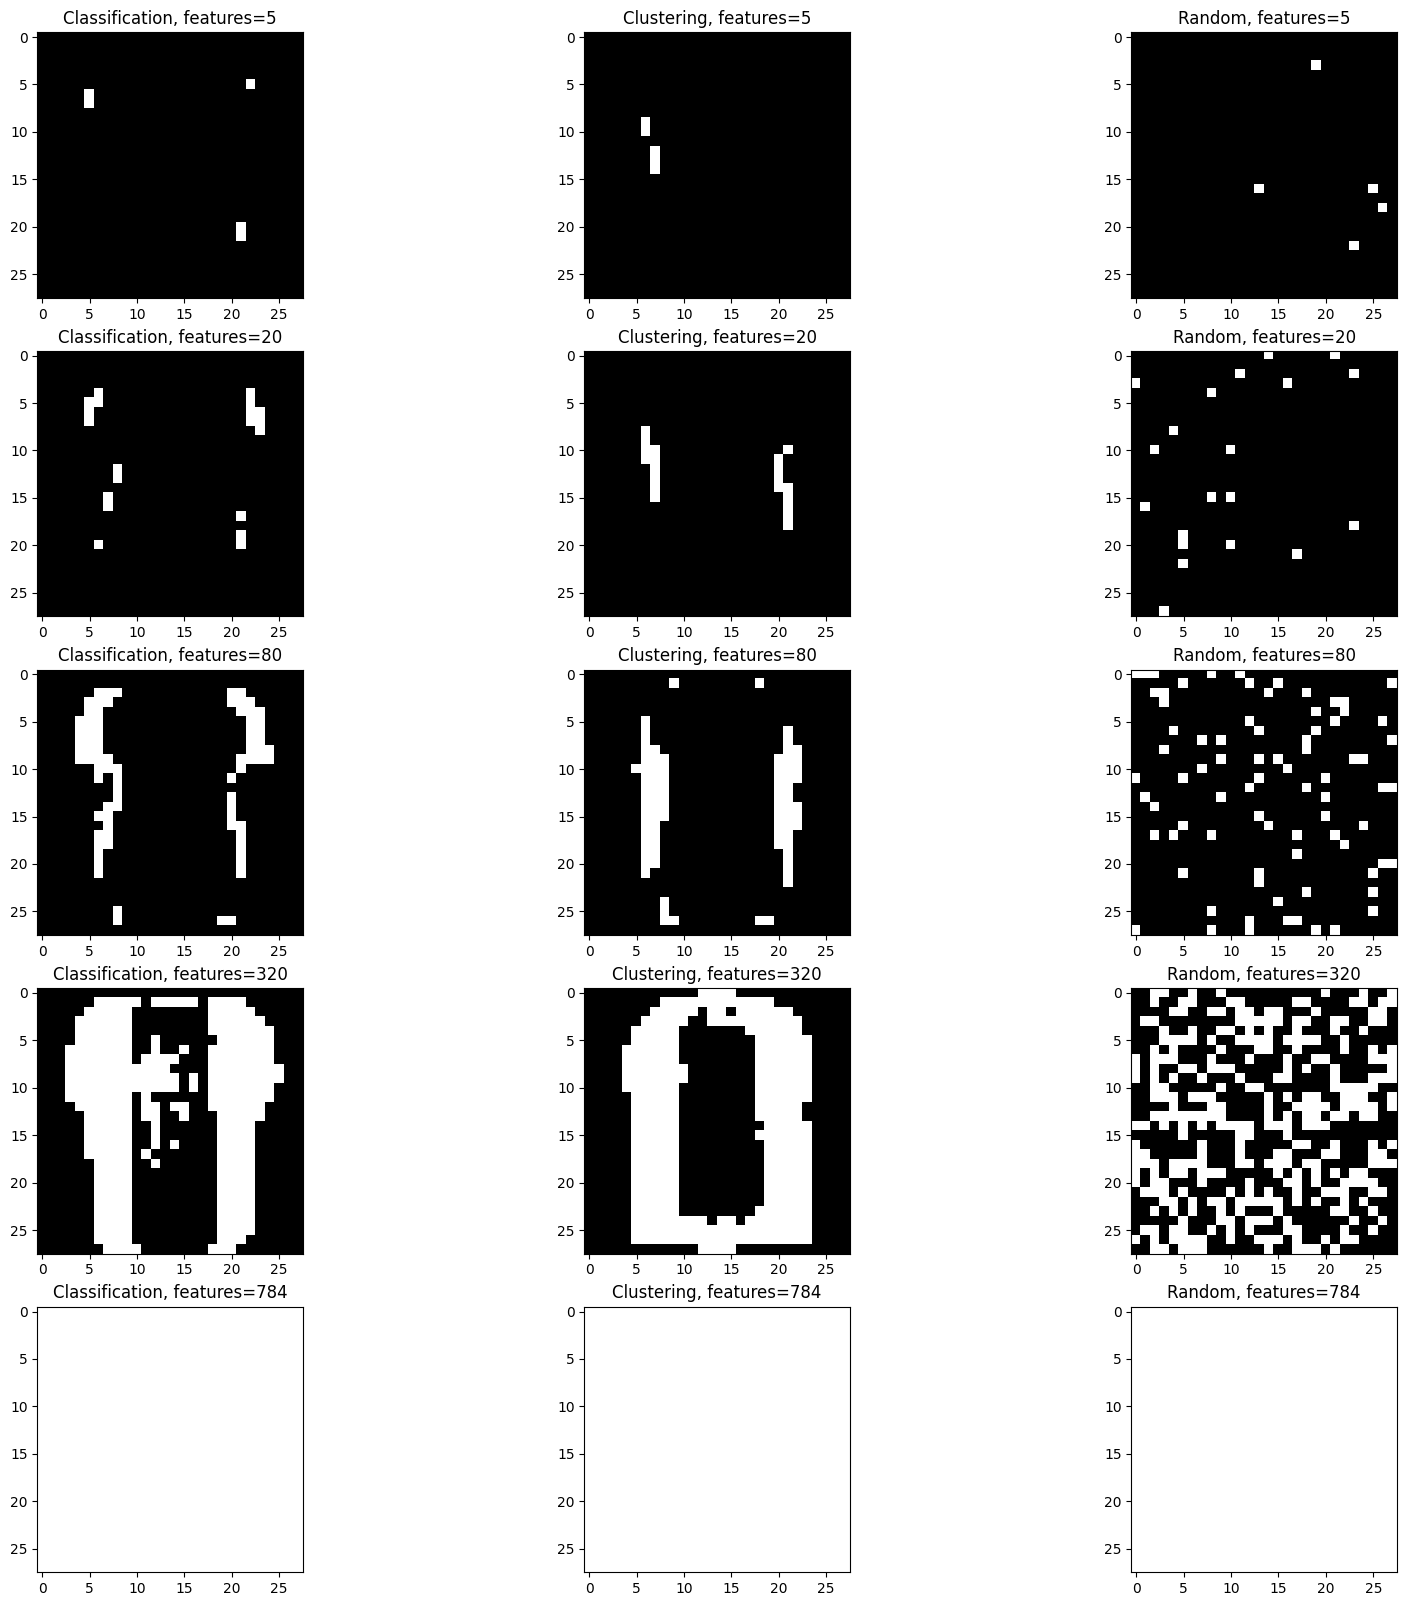

In [43]:
fig, axs = plt.subplots(5,3)

fig.set_figheight(20)
fig.set_figwidth(20)

for i, num_features in enumerate(num_features_list):
    img = np.zeros(784)
    img[classifier_features_dict[num_features]] = 1
    axs[i,0].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,0].set_title(f"Classification, features={num_features}")

    img = np.zeros(784)
    img[clustering_features_dict[num_features]] = 1
    axs[i,1].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,1].set_title(f"Clustering, features={num_features}")
    
    img = np.zeros(784)
    img[random_selected_features_list[i]] = 1
    axs[i,2].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,2].set_title(f"Random, features={num_features}")

In [44]:
result3_2 = {'feature_number':                  [5, 20, 80, 320, 784], 
             'classifier_accuracy(our algo)':   classifier_accuracy_selected, 
             'classifier_accuracy(random)':     classifier_accuracy_random, 
            # CLASSIFIER TAKES SO LONG TO RUN - USE PLACEHOLDER
            #  'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 
            #  'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6],
             'clustering_accuracy(our algo)':   clustering_accuracy_selected, 
             'clustering_accuracy(random)':     clustering_accuracy_random, 
             'nmi(our algo)':                   clustering_nmi_selected, 
             'nmi(random)':                     clustering_nmi_random}

# Final Combine

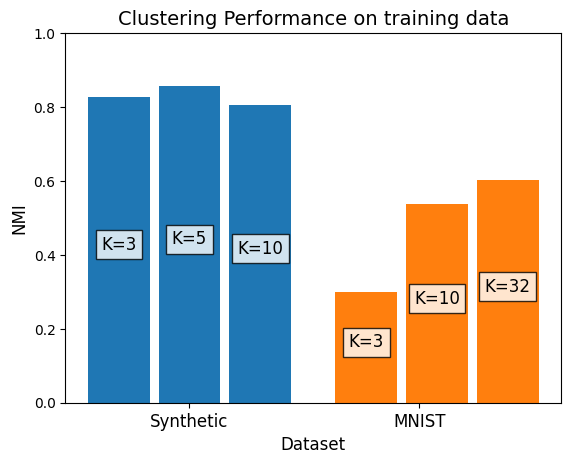

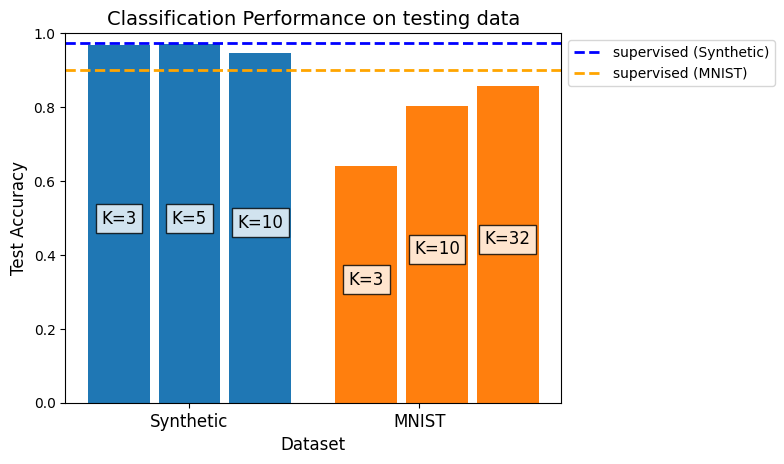

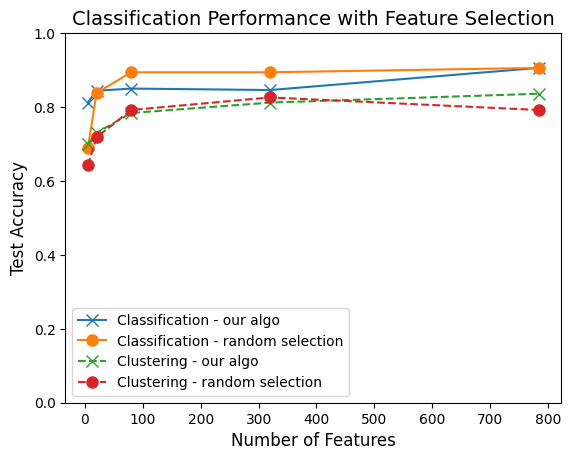

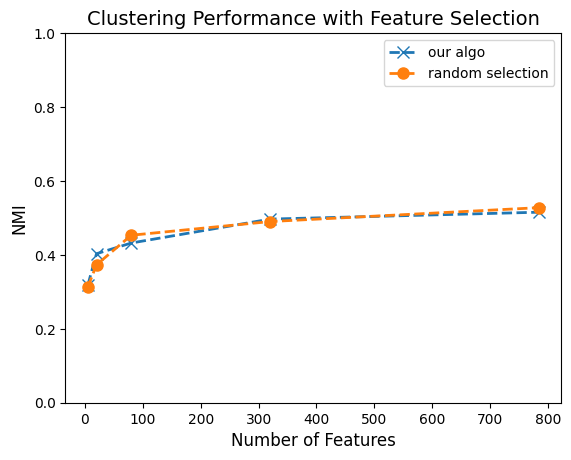

In [ ]:
result1 = {'synthetic_test_accuracy':acc_syn, 'mnist_test_accuracy':acc_mnist}


plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)